In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.nunique()

lat          14579
lng          14586
desc         99455
zip            104
title          110
timeStamp    72577
twp             68
addr         21914
e                1
dtype: int64

### Split the title

In [6]:
major_title_split = list(df['title'].str.split(':'))
major_title = []

for i in range(len(major_title_split)):
    major_title.append(major_title_split[i][0])
    


major_title

['EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Fire',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Fire',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'Traffic',
 'Fire',
 'EMS',
 'Traffic',
 'EMS',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'EMS',
 'Fire',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'Traffic',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'EMS',
 'Fire',
 'EMS',
 'EMS',
 'Traffic',
 'Fire',
 'Traffic',
 'Fire',
 'Traffic',
 'Traffic',
 'Traffic',
 'Traffic',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'EMS',
 'Fi

In [7]:
df['major_title'] = major_title

In [8]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'major_title'],
      dtype='object')

In [9]:
df = df.reindex(columns = ['lat', 'lng', 'desc', 'zip', 'title','major_title', 'timeStamp', 'twp', 'addr', 'e'])

In [10]:
df.head()

,lat,lng,desc,zip,title,major_title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Set a date out of timestamp

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df['date'] = df['timeStamp'].dt.date

In [13]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp', 'twp',
       'addr', 'e', 'date'],
      dtype='object')

In [14]:
df = df.reindex(columns = ['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp','date', 'twp','addr', 'e'])
df.head()

,lat,lng,desc,zip,title,major_title,timeStamp,date,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,2015-12-10,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,2015-12-10,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,2015-12-10,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,2015-12-10,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,lat,lng,desc,zip,title,major_title,timeStamp,date,twp,addr,e,year,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,2015-12-10,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,2015-12-10,NORRISTOWN,HAWS AVE,1,2015,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,2015-12-10,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,2015-12-10,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12


In [17]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp',
       'date', 'twp', 'addr', 'e', 'year', 'month'],
      dtype='object')

In [18]:
df = df.reindex(columns = ['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp','date', 'year', 'month', 'twp', 'addr', 'e'])
df.head()

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,2015-12-10,2015,12,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,2015-12-10,2015,12,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,2015-12-10,2015,12,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Concat year and month

In [19]:
print(df['date'].min())
print(df['date'].max())

2015-12-10 00:00:00
2016-08-24 00:00:00


In [20]:
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp',
       'date', 'year', 'month', 'twp', 'addr', 'e', 'year_month'],
      dtype='object')

In [21]:
df = df.reindex(columns = ['lat', 'lng', 'desc', 'zip', 'title', 'major_title', 'timeStamp','date', 'year', 'month','year_month', 'twp', 'addr', 'e'])


In [22]:
df.head()

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,year_month,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,2015-12-10,2015,12,2015-12,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,2015-12-10,2015,12,2015-12,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


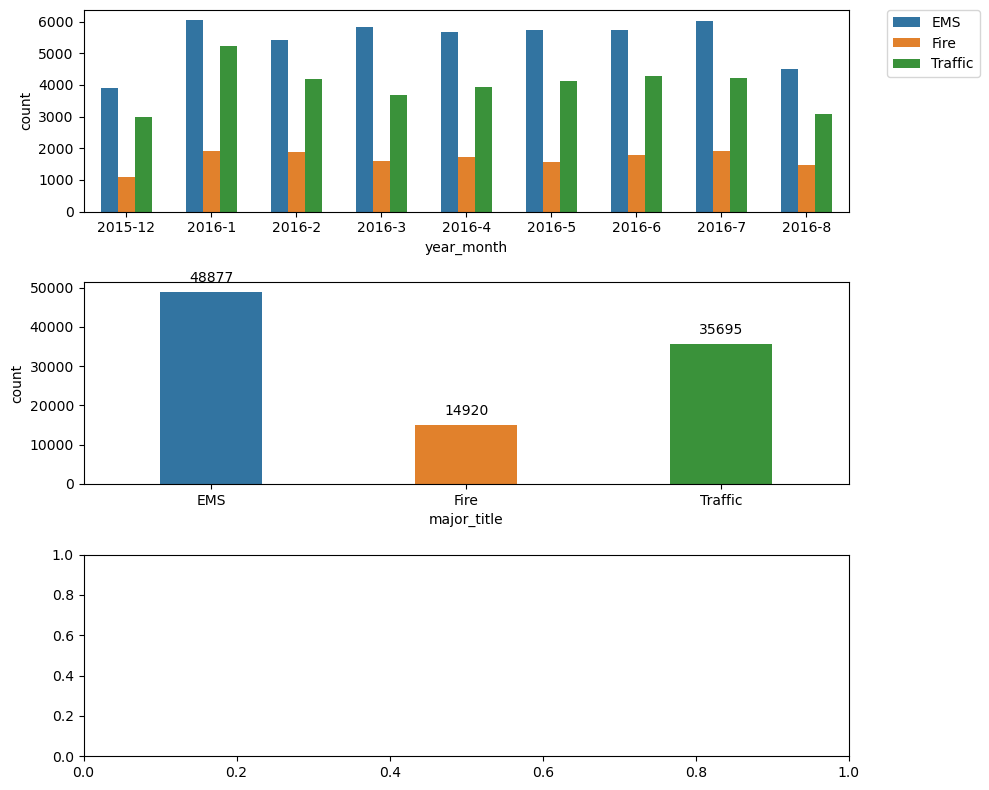

In [125]:
fig, ax = plt.subplots(3, figsize = (10,8))

sns.countplot(df,x = 'year_month', hue  = 'major_title', width=0.6, ax = ax[0])
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.countplot(df,x = 'major_title', width=0.4,ax = ax[1])

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
    
plt.tight_layout()

### Exploring the lat and lng

In [24]:
df.head(1)

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,year_month,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NEW HANOVER,REINDEER CT & DEAD END,1


In [25]:
df.describe()

,lat,lng,zip,year,month,e
count,99492.000000,99492.000000,86637.000000,99492.000000,99492.000000,99492.0
mean,40.159526,-75.317464,19237.658298,2015.919903,4.983195,1.0
std,0.094446,0.174826,345.344914,0.271445,3.012176,0.0
min,30.333596,-95.595595,17752.000000,2015.000000,1.000000,1.0
25%,40.100423,-75.392104,19038.000000,2016.000000,3.000000,1.0
50%,40.145223,-75.304667,19401.000000,2016.000000,5.000000,1.0
75%,40.229008,-75.212513,19446.000000,2016.000000,7.000000,1.0
max,41.167156,-74.995041,77316.000000,2016.000000,12.000000,1.0


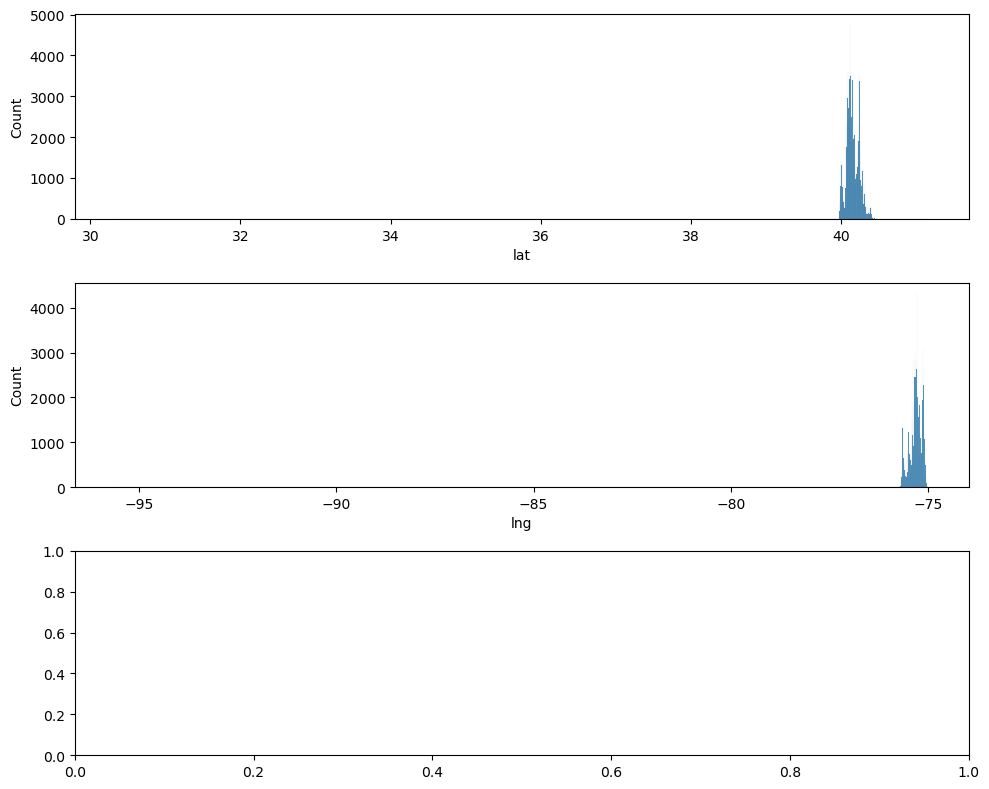

In [35]:
fig, ax = plt.subplots(3, figsize = (10,8))

sns.histplot(df,x = 'lat', ax = ax[0])
sns.histplot(df,x = 'lng',ax = ax[1])

plt.tight_layout()

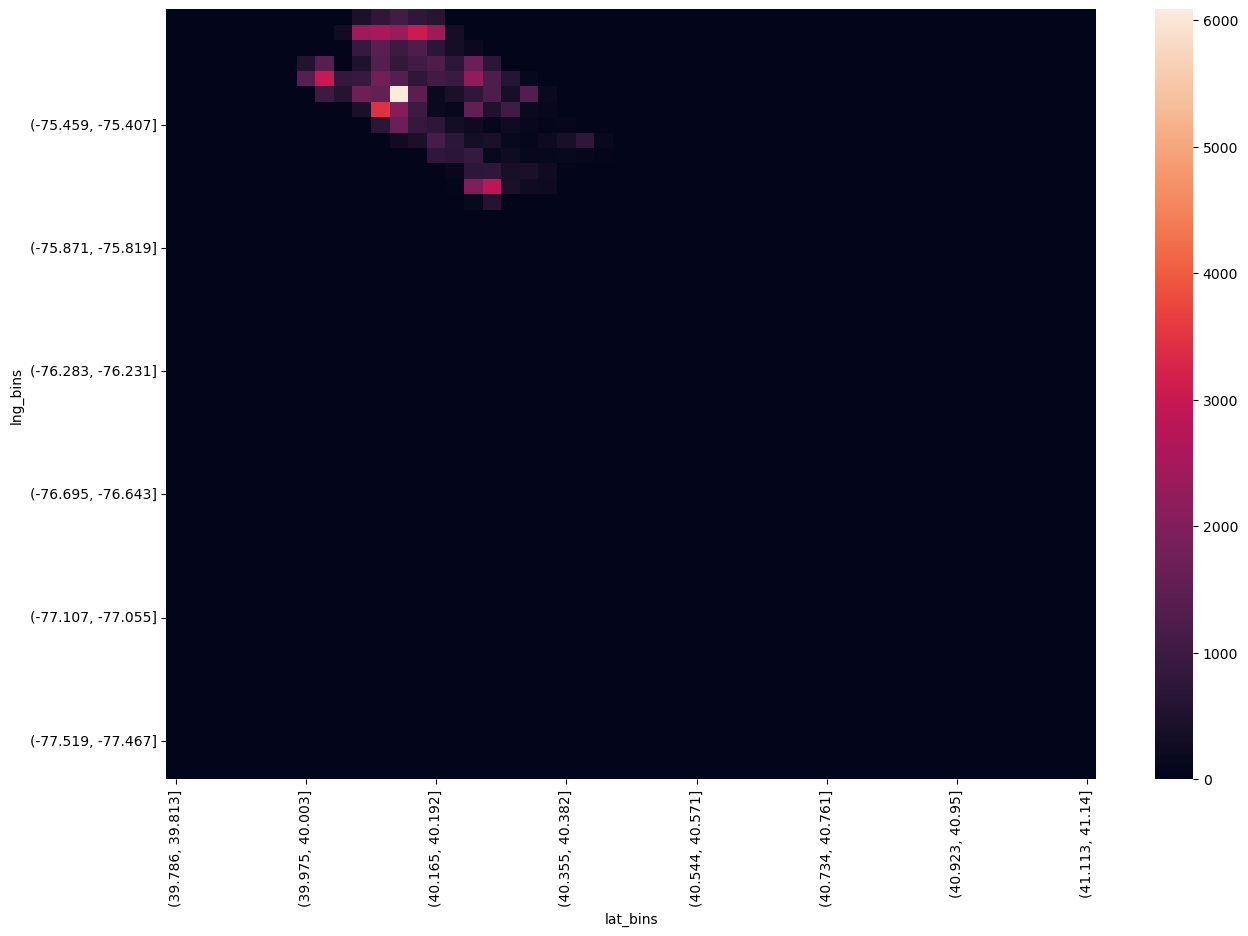

In [86]:
#lat & lng analysis


#define lat bins

bins_no = 400

lat_min_range = min(df['lat'])
lat_max_range = max(df['lat'])
lat_range_step = (lat_max_range-lat_min_range)/bins_no

lat_min_range = min(df['lat'])-lat_range_step
lat_max_range = max(df['lat'])+lat_range_step

lat_bins = pd.cut(df['lat'],np.arange(lat_min_range,lat_max_range,lat_range_step))

#define lng bins

lng_min_range = min(df['lng'])
lng_max_range = max(df['lng'])
lng_range_step = (lng_max_range-lng_min_range)/bins_no

lng_min_range = min(df['lng'])-lng_range_step
lng_max_range = max(df['lng'])+lng_range_step

lng_bins = pd.cut(df['lng'],np.arange(lng_min_range,lng_max_range,lng_range_step))



#add bins to df
df['lng_bins'] = lng_bins
df['lat_bins'] = lat_bins
df_matrix = df.pivot_table(values = 'e',index='lng_bins',columns='lat_bins',aggfunc='sum')

plt.figure(figsize = (15,10))
sns.heatmap(df_matrix)


plt.ylim(bins_no-bins_no/8, bins_no)
plt.xlim(bins_no-bins_no/8, bins_no)

plt.savefig('test me')

In [79]:
df.head(1)

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,year_month,twp,addr,e,lng_bins,lat_bins
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NEW HANOVER,REINDEER CT & DEAD END,1,"(-75.582, -75.577]","(40.298, 40.3]"


In [85]:
df.pivot_table(values= 'e', index= 'twp',aggfunc='sum').reset_index().sort_values('e',ascending=False).head(5)

,twp,e
26,LOWER MERION,8443
0,ABINGTON,5977
35,NORRISTOWN,5890
57,UPPER MERION,5227
6,CHELTENHAM,4575


### add hour / day analysis

In [90]:
df['Hour'] = df['timeStamp'].dt.hour

In [95]:
df['Day'] = df['timeStamp'].dt.weekday

In [97]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [108]:
df['Day Name'] = None
for i in range(len(df)):
    df['Day Name'].iloc[i] = dmap[df['Day'].iloc[i]]



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1856\2011115597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day Name'].iloc[i] = dmap[df['Day'].iloc[i]]


In [111]:
df['Day Name'] = df['Day'].map(dmap)

In [112]:
df.head(1)

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,year_month,twp,addr,e,lng_bins,lat_bins,Hour,Day,Day Name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NEW HANOVER,REINDEER CT & DEAD END,1,"(-75.613, -75.562]","(40.273, 40.3]",17,3,Thu


<Axes: xlabel='Day Name', ylabel='month'>

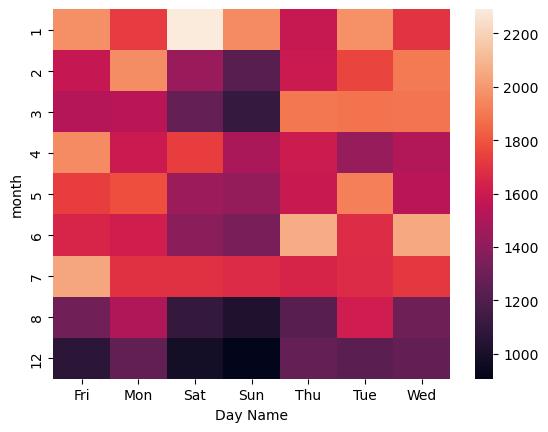

In [118]:
# Month vs day
sns.heatmap(df.pivot_table(values = 'e', index = 'month', columns = 'Day Name', aggfunc='sum'))

<Axes: xlabel='Hour', ylabel='Day Name'>

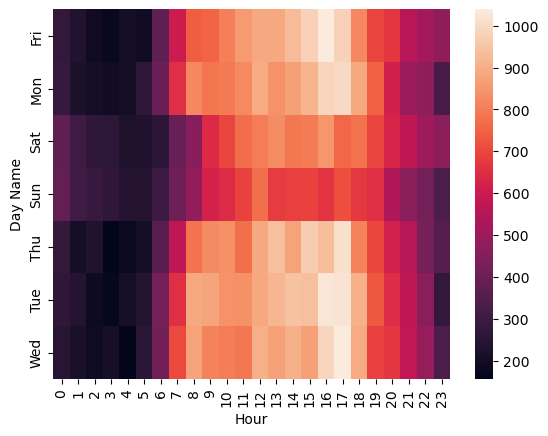

In [115]:
# Day vs Hr
sns.heatmap(df.pivot_table(values = 'e', index = 'Day Name', columns = 'Hour', aggfunc='sum'))

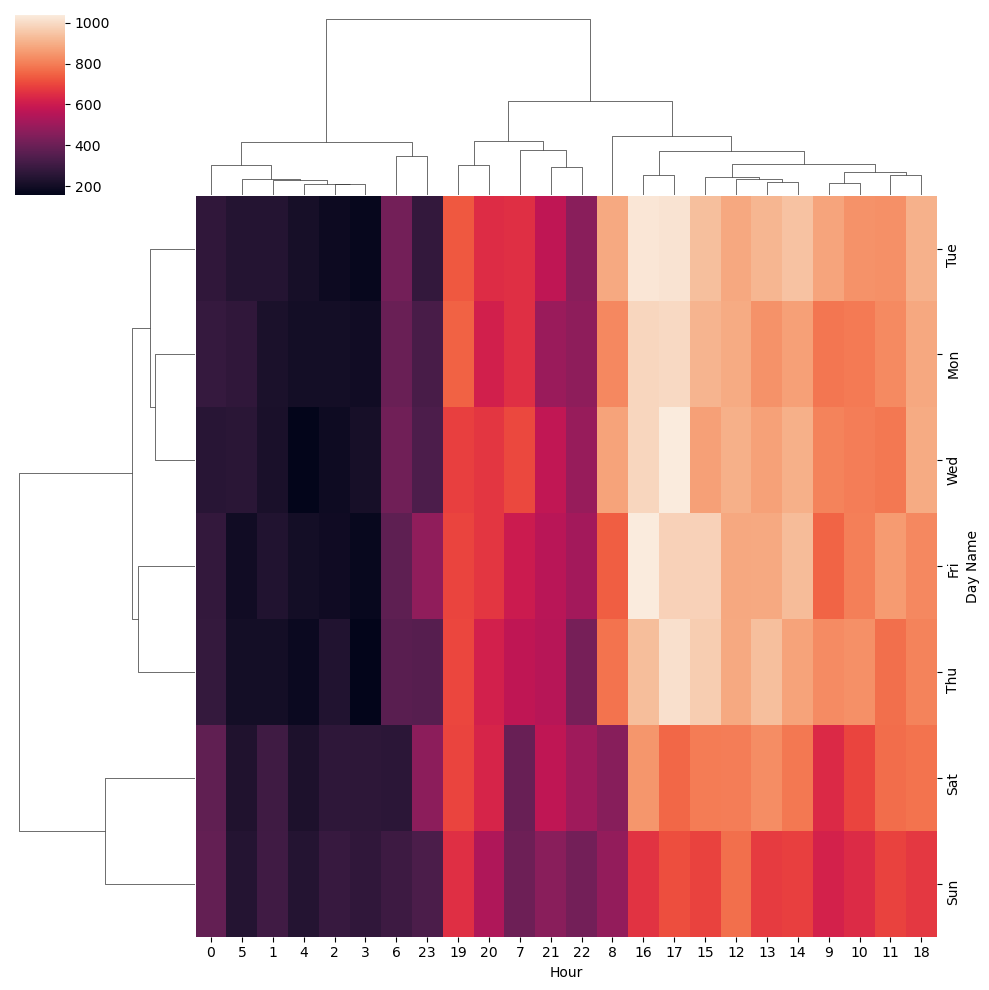

In [119]:
# Day vs Hr
sns.clustermap(df.pivot_table(values = 'e', index = 'Day Name', columns = 'Hour', aggfunc='sum'))

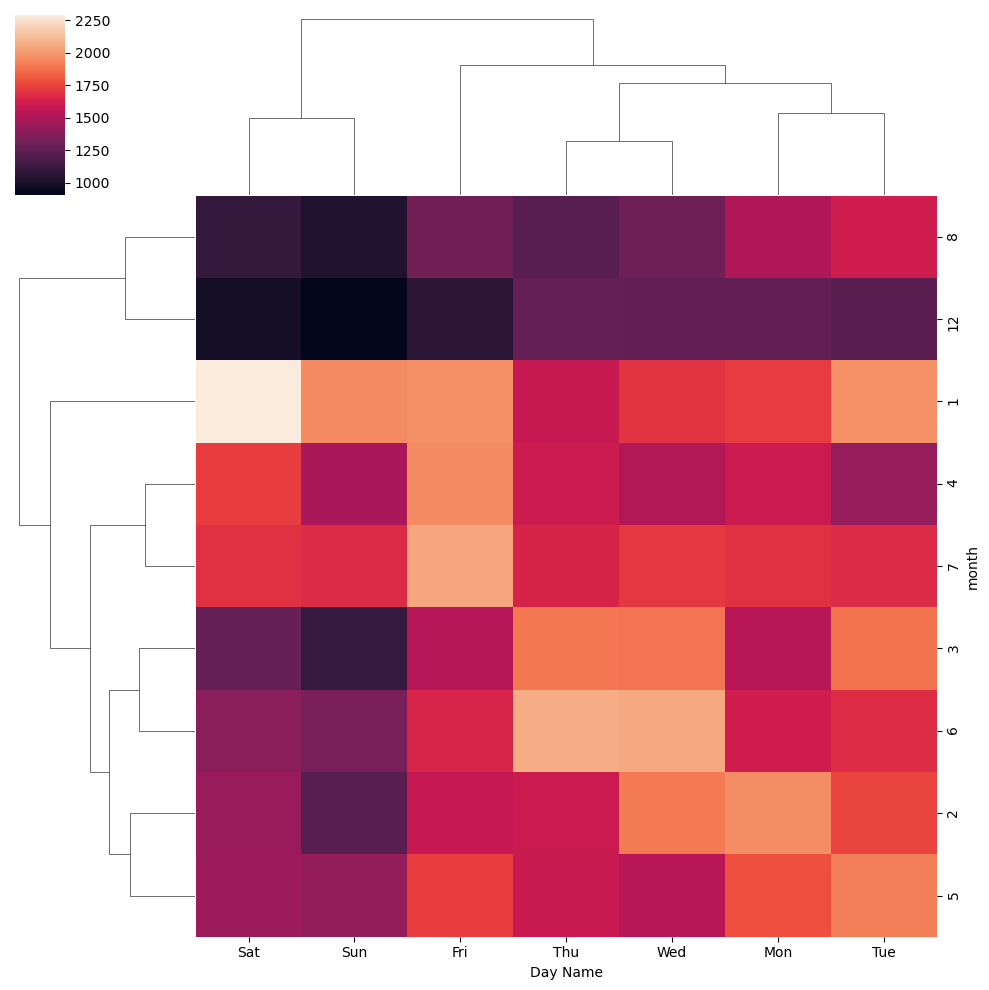

In [120]:
# Month vs day
sns.clustermap(df.pivot_table(values = 'e', index = 'month', columns = 'Day Name', aggfunc='sum'))

<Axes: xlabel='Day Name', ylabel='count'>

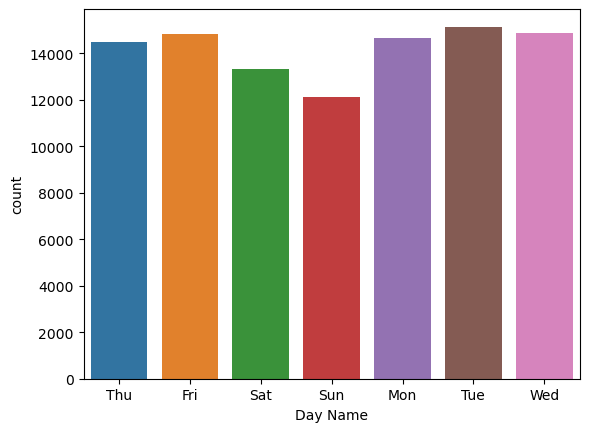

In [121]:
sns.countplot(df,x = 'Day Name')

In [129]:
df.head(1)

,lat,lng,desc,zip,title,major_title,timeStamp,date,year,month,year_month,twp,addr,e,lng_bins,lat_bins,Hour,Day,Day Name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,2015-12-10,2015,12,2015-12,NEW HANOVER,REINDEER CT & DEAD END,1,"(-75.613, -75.562]","(40.273, 40.3]",17,3,Thu


In [150]:
df['major_title'].uniqueque()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

<Axes: xlabel='date', ylabel='e'>

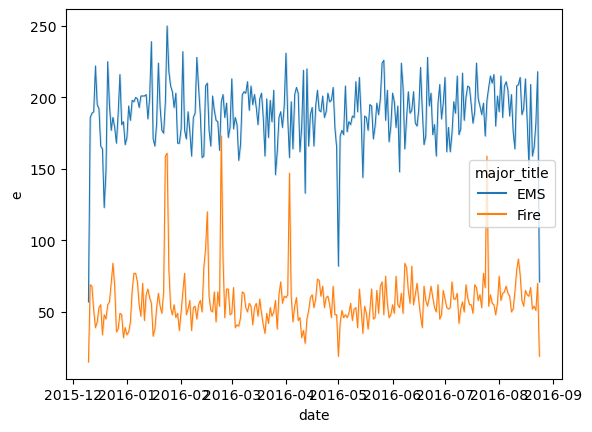

In [152]:
sns.lineplot(df[(df['major_title']=='EMS') | (df['major_title']=='Fire')],x = 'date',y= 'e', estimator='sum', lw = 0.8, hue='major_title')

<Figure size 1000x200 with 0 Axes>

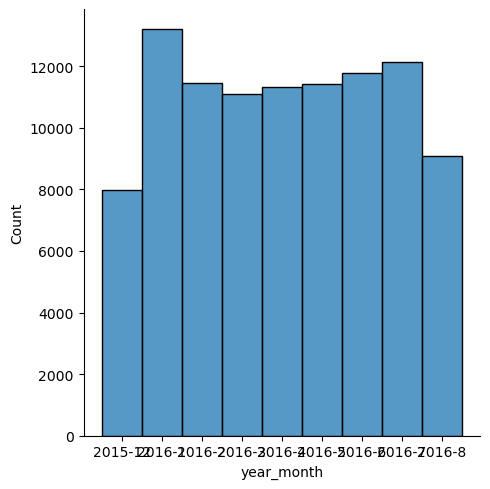

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'year_month' is the column to plot

# Set the figure size
plt.figure(figsize=(10, 2))

# Generate the distribution plot
sns.displot(data=df, x='year_month')

# Show the plot
plt.show()